In [1]:
!python flow/visualize/visualizer_rllib.py\
/home/michael-lab/ray_results/singleagent_figure_eight/PPO_AccelEnv-v0_eb7e4852_2022-09-09_16-32-350s0be3r3/ 42\
--num_rollouts 10

2022-09-12 12:42:53,168	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2022-09-12 12:42:53,168	INFO resource_spec.py:216 -- Starting Ray with 14.94 GiB memory available for workers and up to 7.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2022-09-12 12:42:53,474	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2022-09-12 12:42:53,476	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-09-12 12:42:56,128	WARNING util.py:45 -- Install gputil for GPU system monitoring.
2022-09-12 12:42:56,168	INFO trainable.py:346 -- Restored from checkpoint: /home/michael-lab/ray_results/singleagent_figure_eight/PPO_AccelEnv-v0_eb7e4852_2022-09-09_16-32-350s0be3r3/checkpoint_42/checkpoint-42
2022-09-12 12:42:56,168	INFO trainable.

### Trial Results Directory Name

In [2]:
results_dir_name = "trial_results"

## Mean Over Rollout

In [3]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_vehs = np.mean(data)
        mean_collector.append(mean_vehs)
        print(f"Mean Velocity Over Rollout: {mean_vehs}")
        with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
            g.write(f"Mean Velocity Over Rollout: {mean_vehs}\n")

with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
    mean_rollout = np.mean(mean_collector)
    std_rollout = np.std(mean_collector)
    var_rollout = np.var(mean_collector)
    
    g.write(f"Mean of Rollouts: {mean_rollout}\n")
    g.write(f"Std of Rollouts: {std_rollout}\n")
    g.write(f"Variance of Rollouts: {var_rollout}\n")

Mean Velocity Over Rollout: 5.183887232072124
Mean Velocity Over Rollout: 5.089614968588569
Mean Velocity Over Rollout: 5.106322865195743
Mean Velocity Over Rollout: 5.172400502310089
Mean Velocity Over Rollout: 4.9105165278474665
Mean Velocity Over Rollout: 5.152673931478688
Mean Velocity Over Rollout: 5.223007941149534
Mean Velocity Over Rollout: 5.235410196435047
Mean Velocity Over Rollout: 5.0848083324189135
Mean Velocity Over Rollout: 5.131530762330291


## Mean and Min for Last 100 Seconds

In [4]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_last_100_seconds = np.mean(data[-1000:])
        mean_collector.append(mean_last_100_seconds)
        print(f"Mean Last 100 Seconds: {mean_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Mean Last 100 Seconds: {mean_last_100_seconds}\n")

print(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}")

with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
    g.write(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}\n")
    
    std_100 = np.std(mean_collector)
    var_100 = np.var(mean_collector)
    
    g.write(f"Std of last 100 secs over rollouts: {std_100}\n")
    g.write(f"Variance of last 100 secs over rollouts: {var_100}\n")

Mean Last 100 Seconds: 5.943801261654795
Mean Last 100 Seconds: 5.850822968764437
Mean Last 100 Seconds: 5.839931026779646
Mean Last 100 Seconds: 5.943867489836642
Mean Last 100 Seconds: 5.593371656654719
Mean Last 100 Seconds: 5.891334750807826
Mean Last 100 Seconds: 6.03756486240396
Mean Last 100 Seconds: 6.04098920158236
Mean Last 100 Seconds: 5.829268437879111
Mean Last 100 Seconds: 5.844703273257227
Mean of last 100 secs over rollouts: 5.881565492962072


In [5]:
import numpy as np

with open(f"./michael_files/{results_dir_name}/min_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        min_last_100_seconds = np.min(data[-1000:])
        print(f"Min Last 100 Seconds: {min_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Min Last 100 Seconds: {min_last_100_seconds}\n")

Min Last 100 Seconds: 2.2609561281551085
Min Last 100 Seconds: 1.9966184315336368
Min Last 100 Seconds: 2.0716657011679676
Min Last 100 Seconds: 2.1571593758129155
Min Last 100 Seconds: 1.978414142488335
Min Last 100 Seconds: 2.20574020813856
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 2.1443526397693007
Min Last 100 Seconds: 2.2676295534542894


## Charting Avg. Velocity for All Vehicles

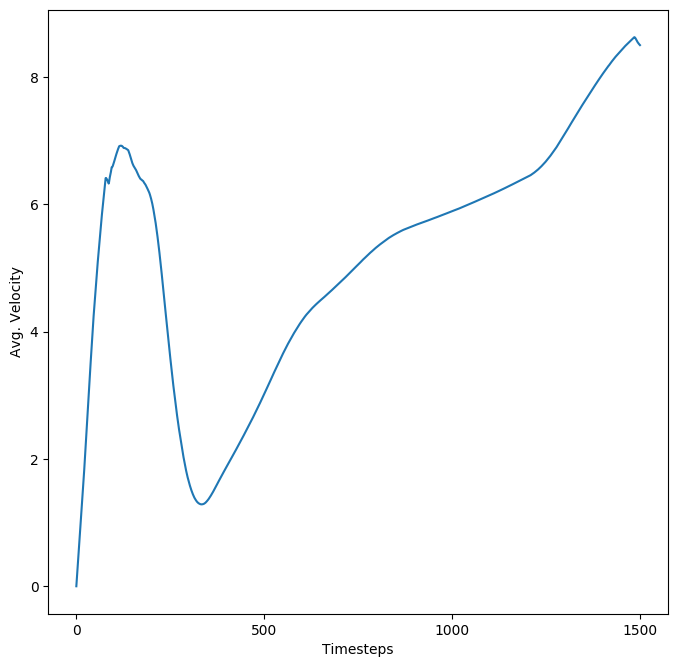

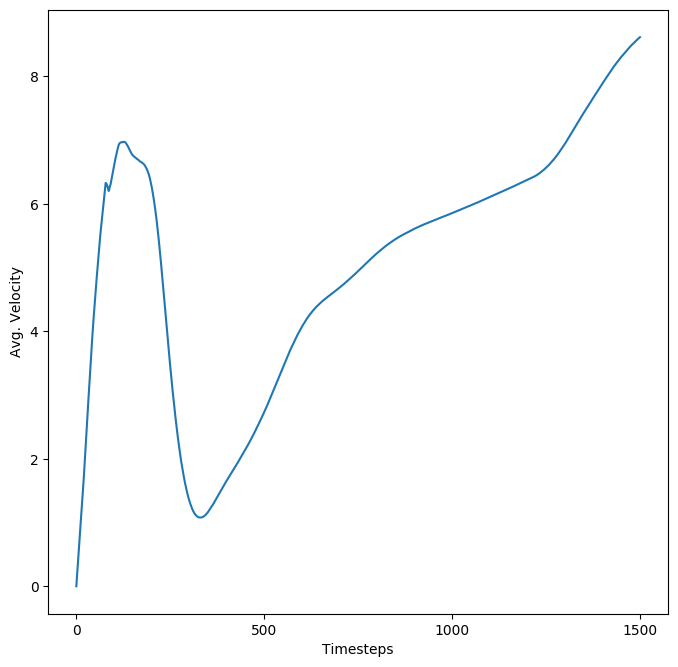

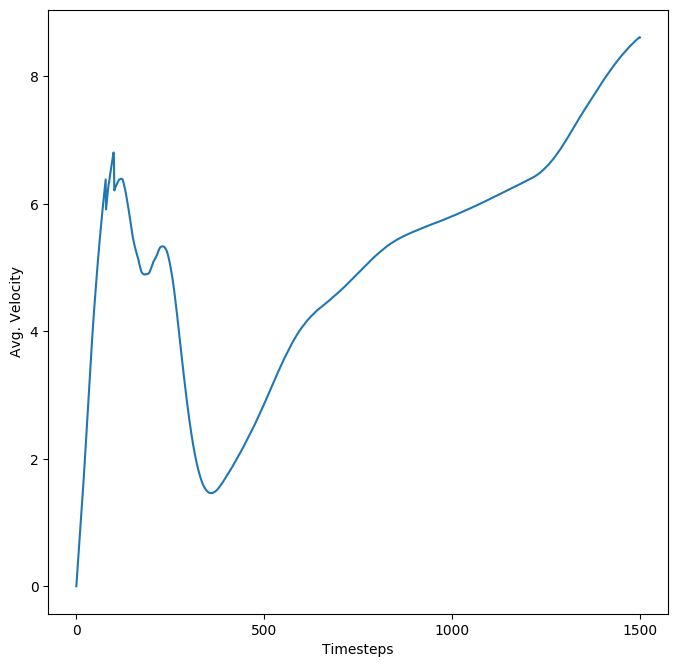

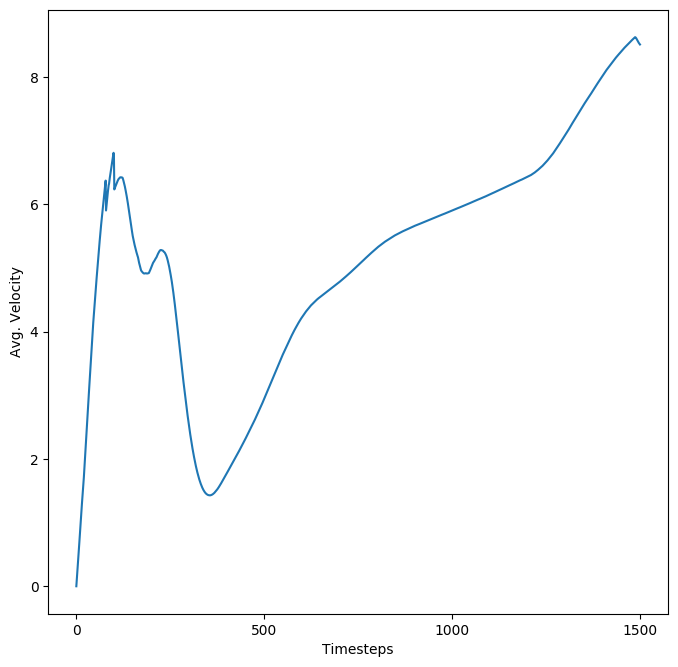

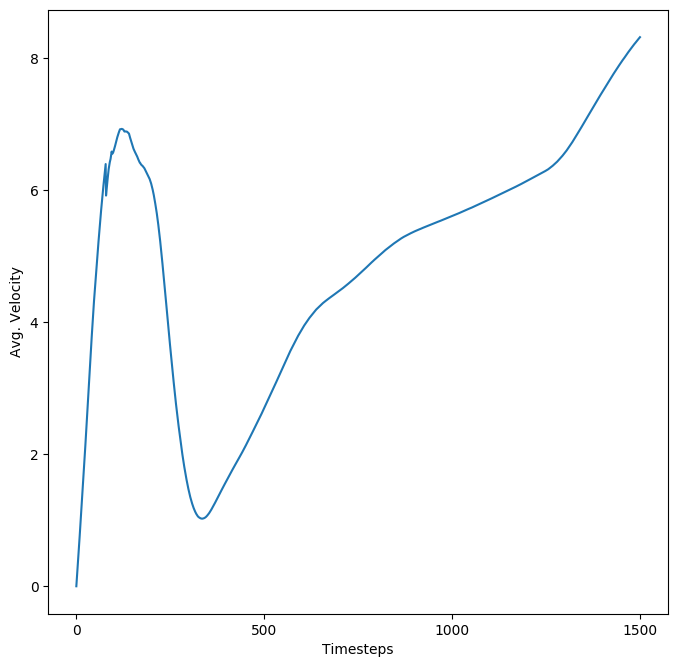

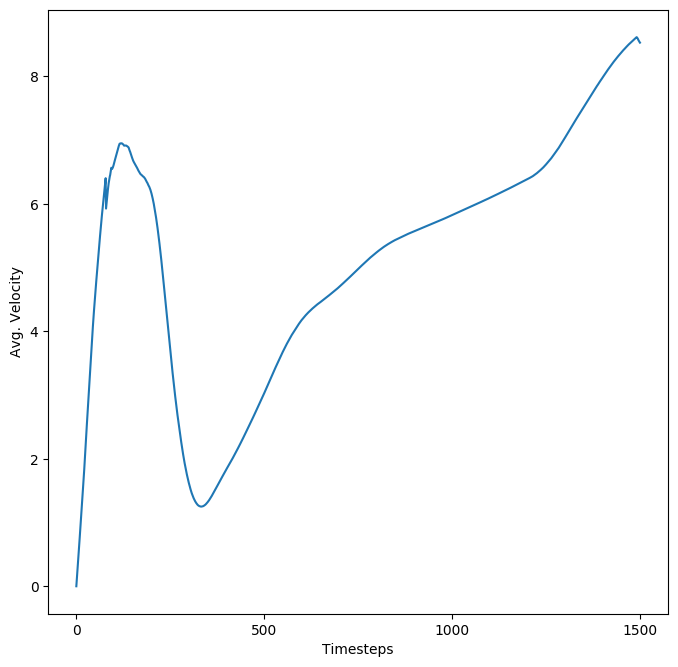

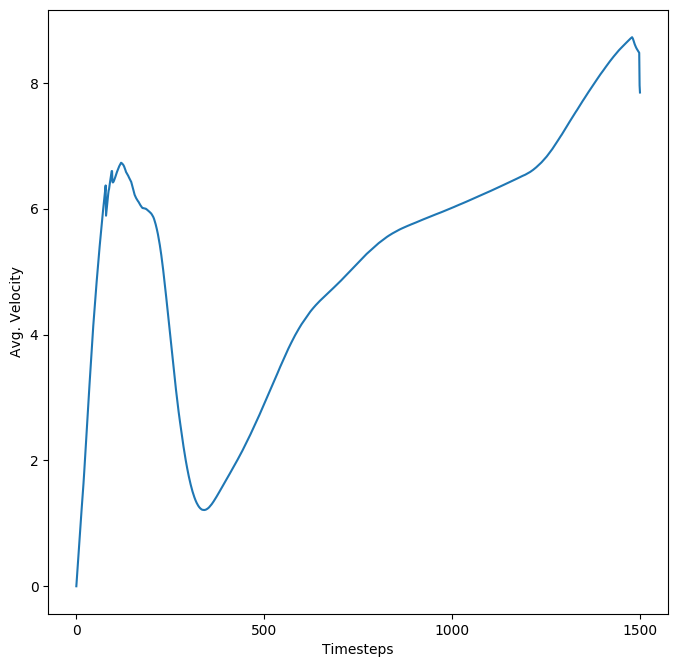

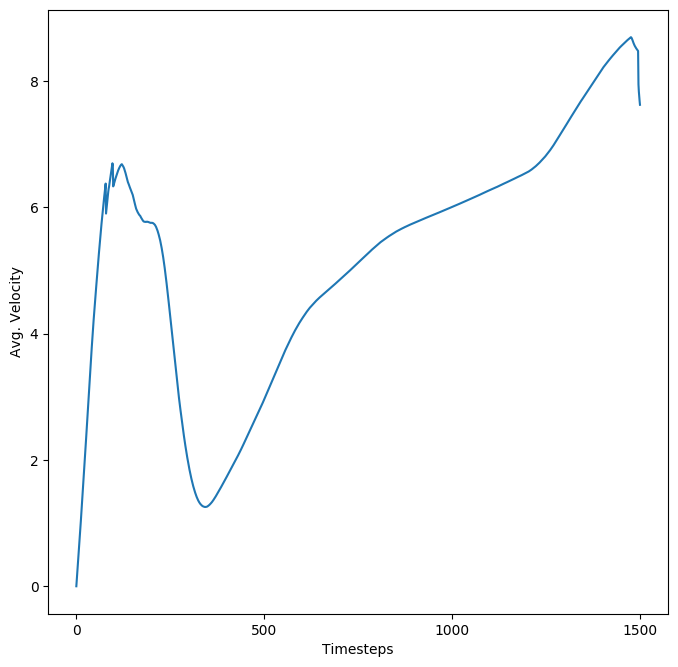

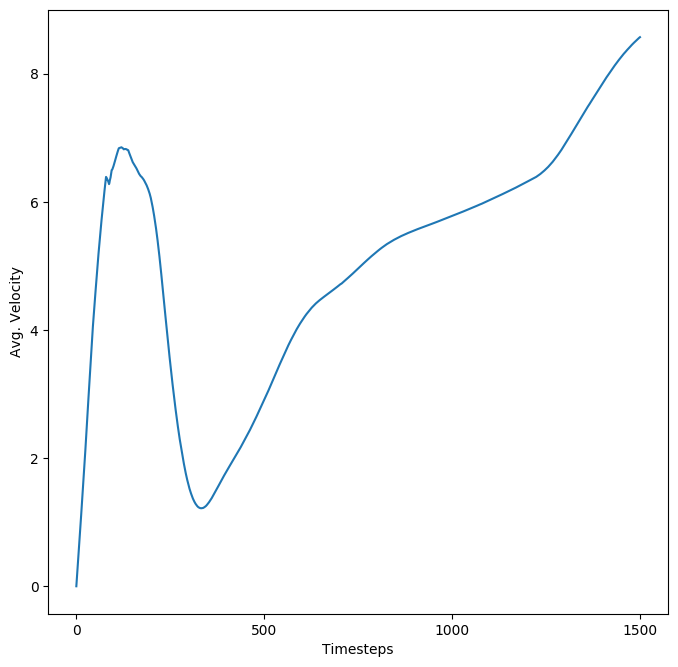

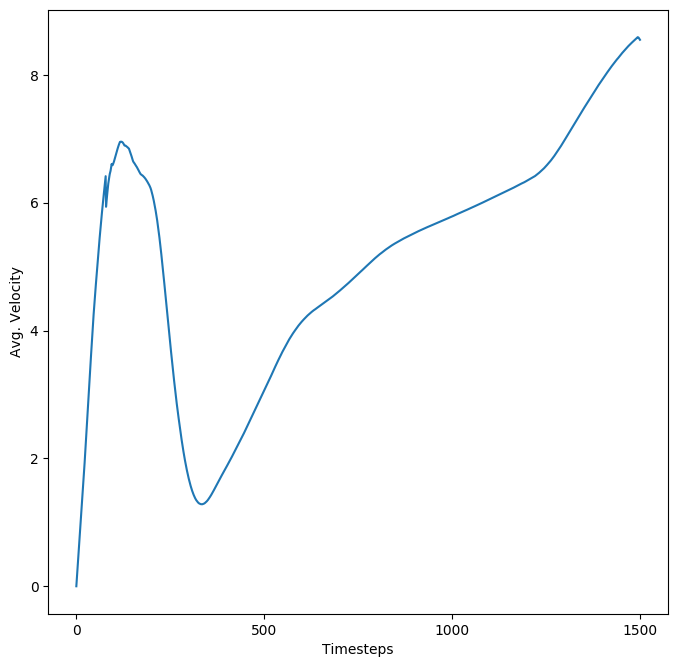

In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("Avg. Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/avg_velocity{count}.png")
        
        count += 1

## Charting RL Velocity

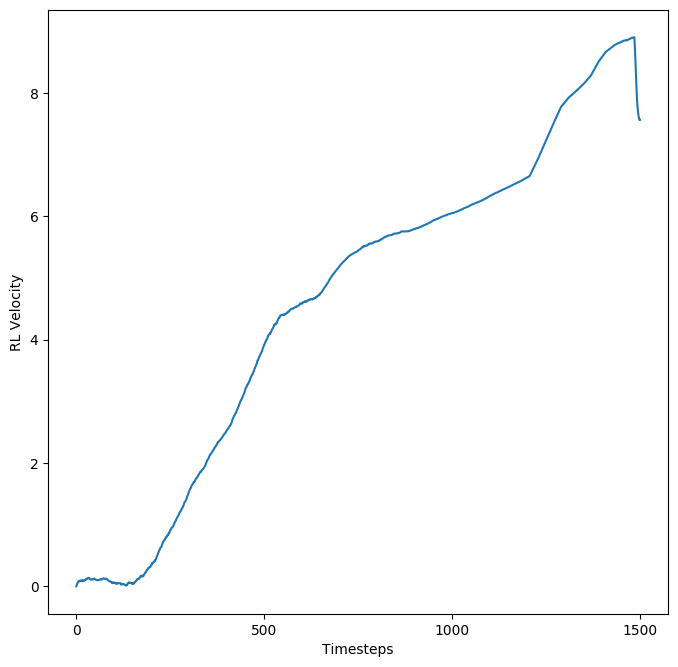

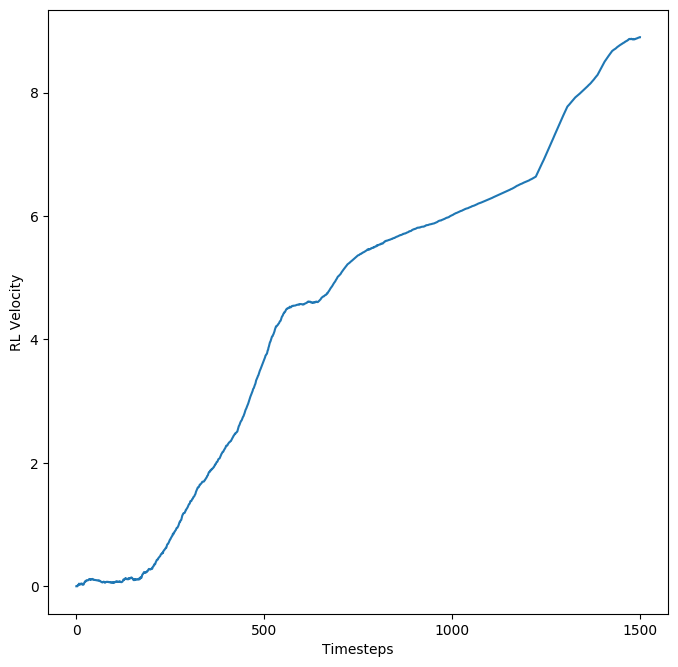

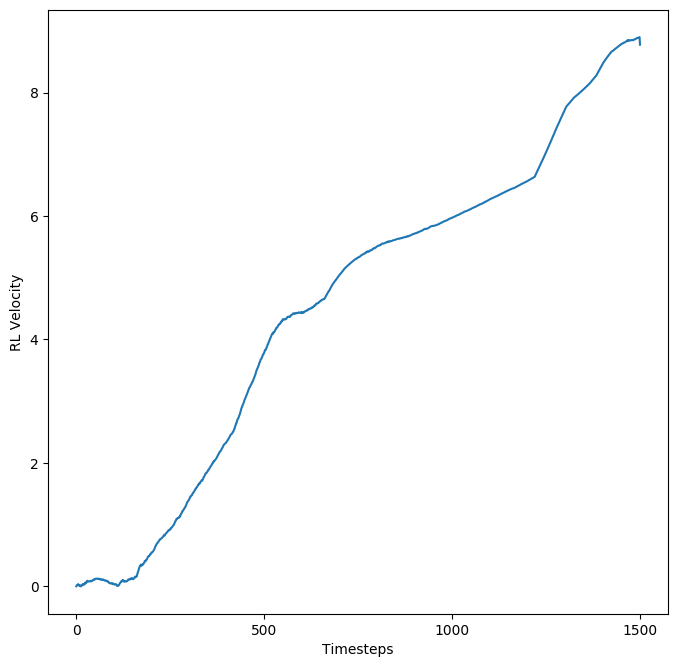

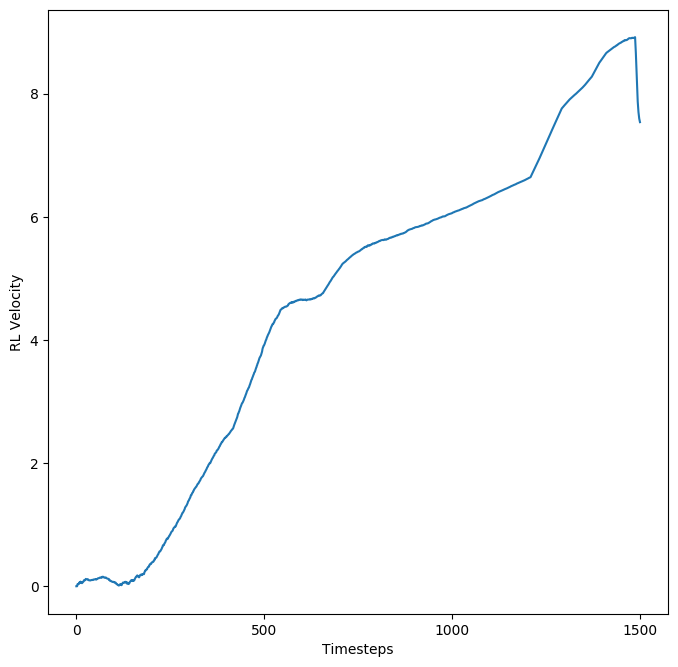

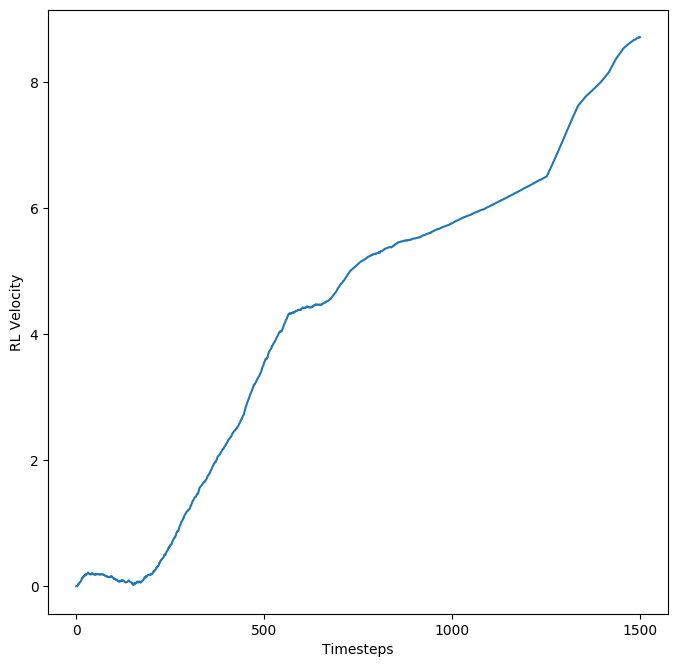

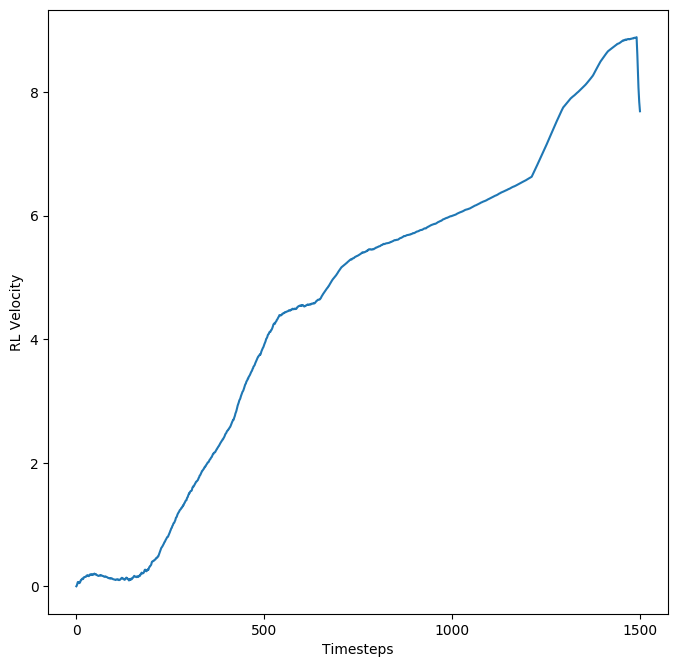

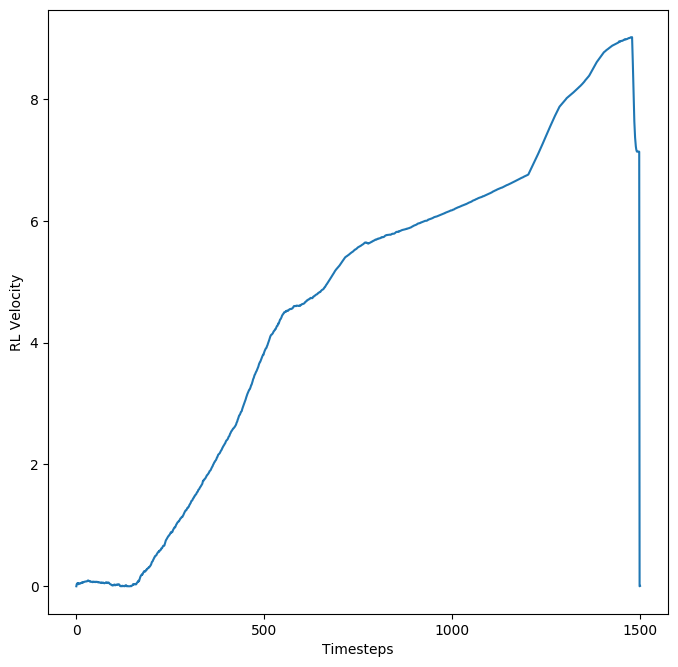

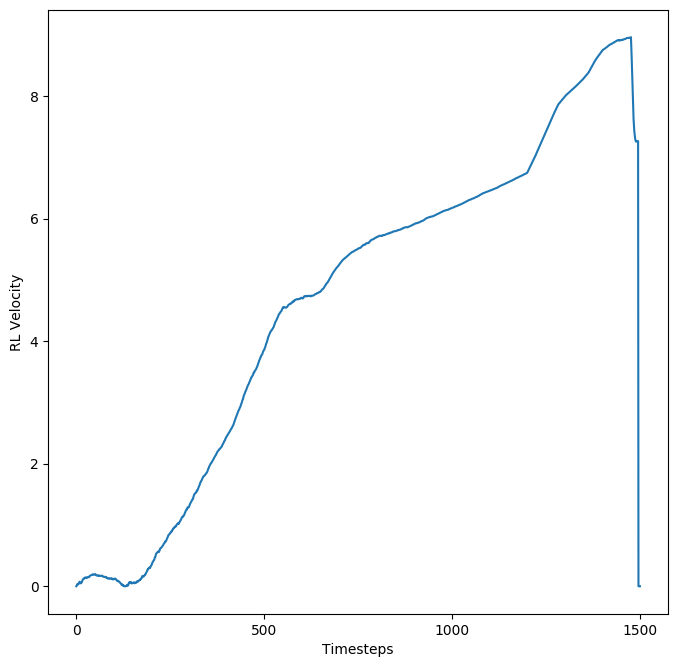

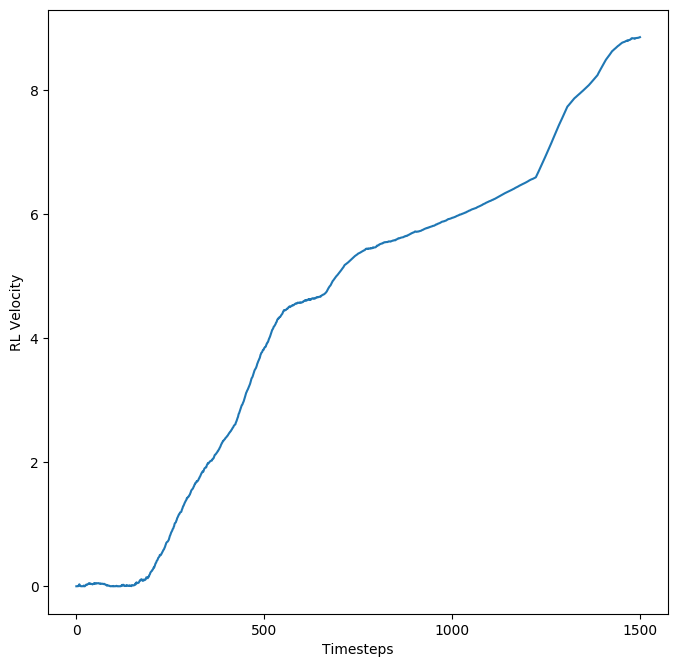

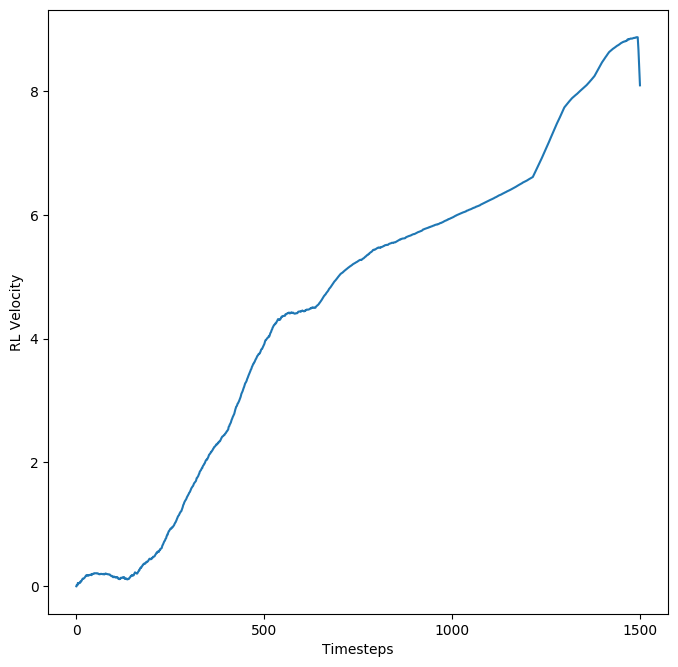

In [7]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_velocity{count}.png")
        
        count += 1

## Charting RL Realized Acceleration

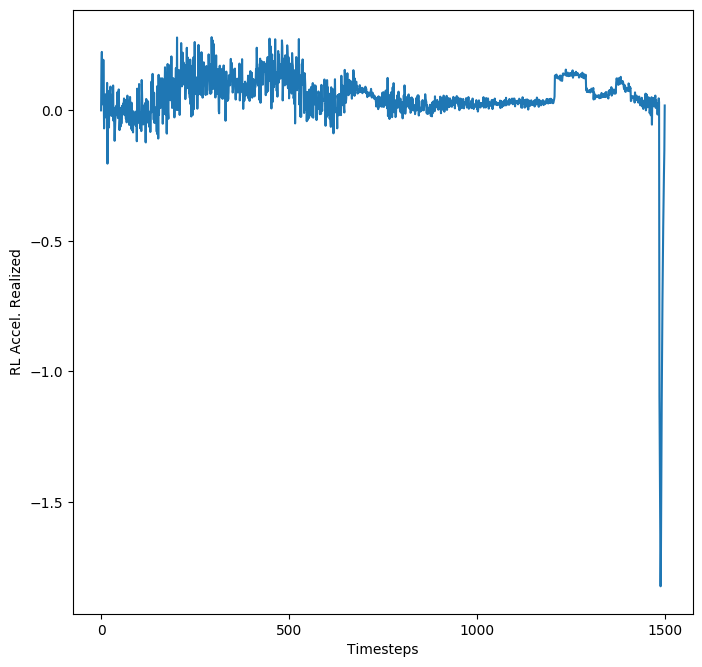

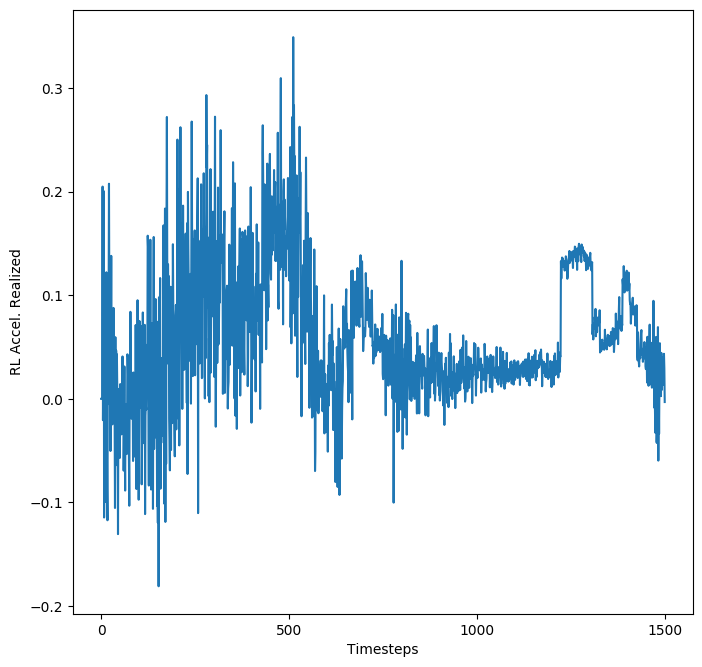

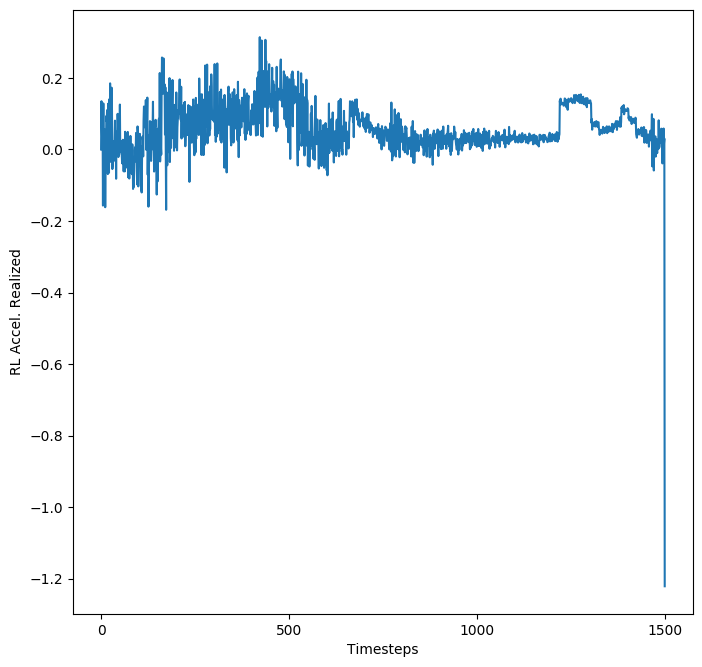

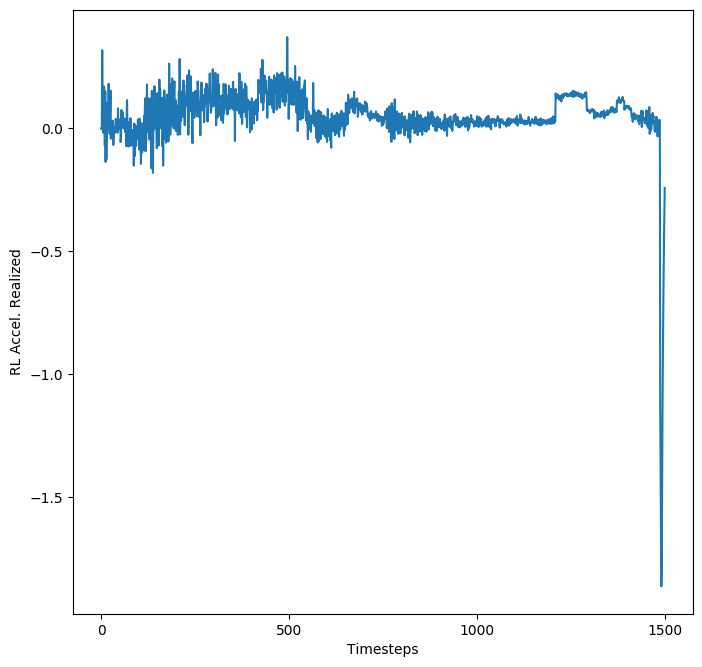

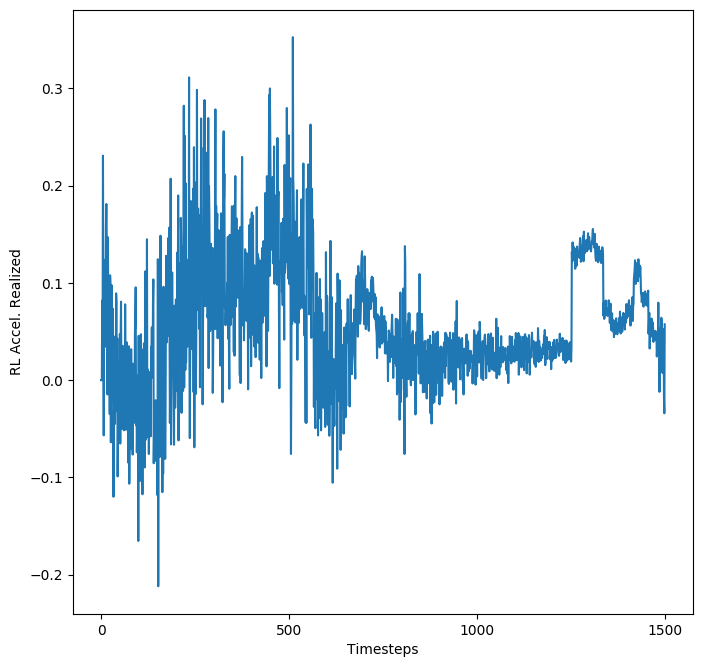

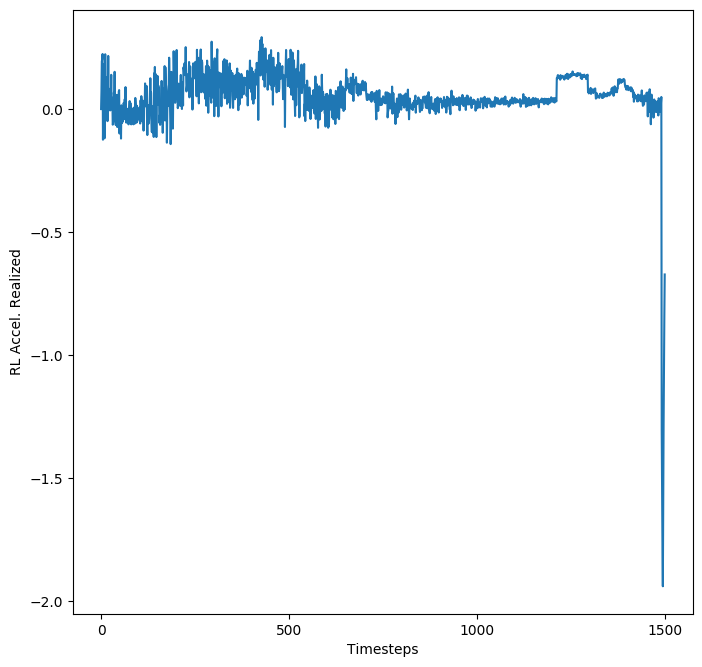

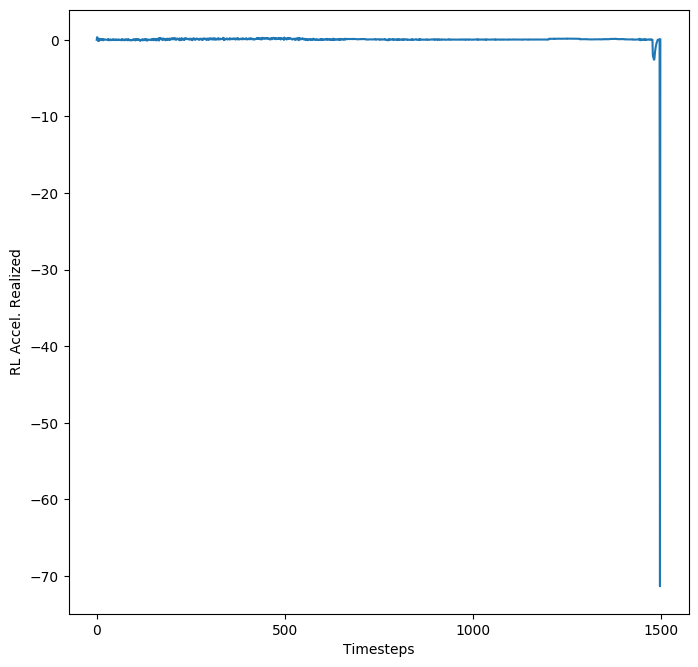

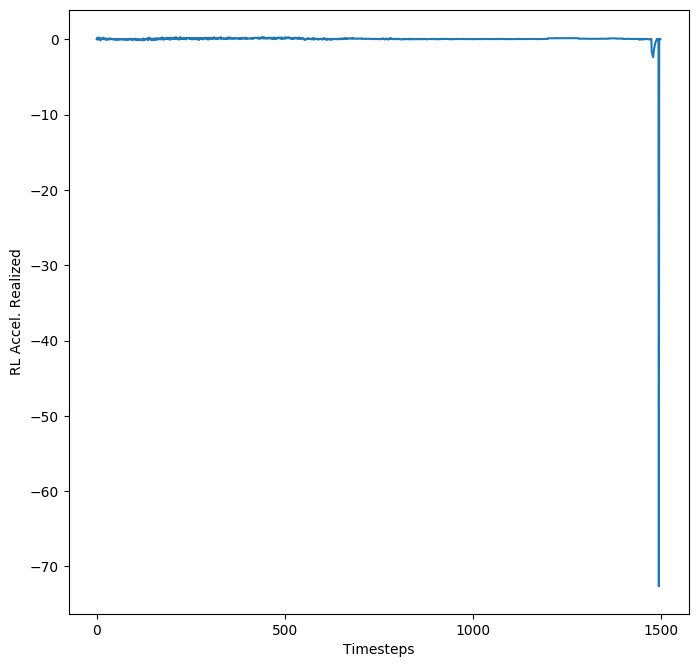

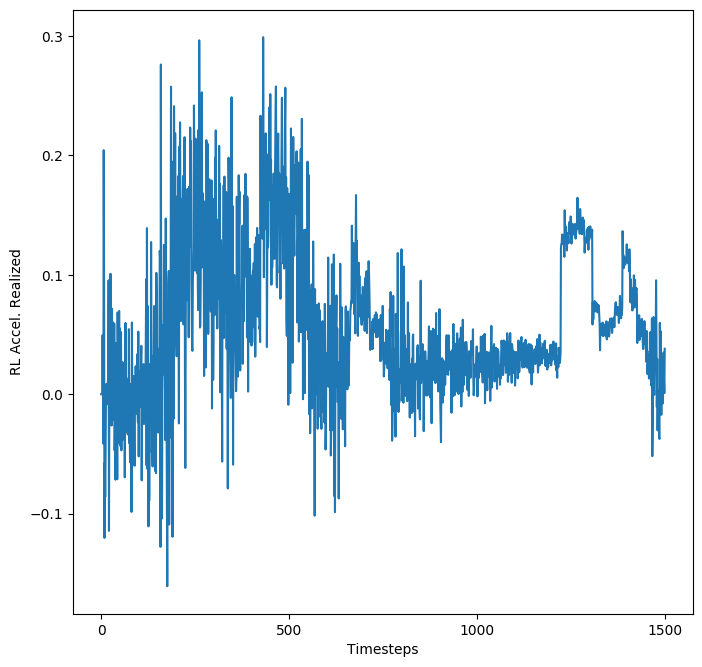

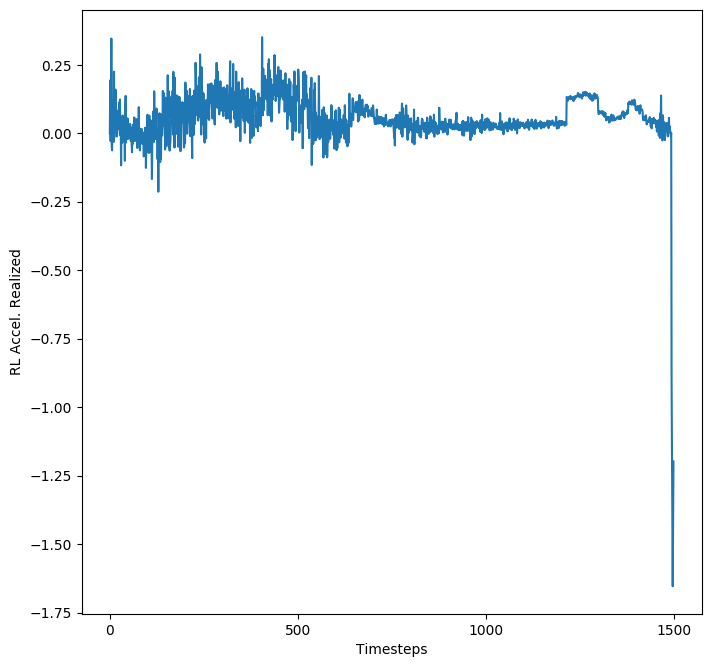

In [8]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_accel_realized.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Accel. Realized")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_accel_realized{count}.png")
        
        count += 1